<a href="https://colab.research.google.com/github/yamini-bi/-EDA_Optimising_NYC_TAXI_yamini.zip-/blob/main/EDA_Assg_NYC_Taxi_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [165]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)


In [166]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [167]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [168]:
# Try loading one file

df = pd.read_parquet('/content/drive/MyDrive/EDA-credit_assig/yellow_tripdata_2023-01.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
df.shape

(3066766, 19)

In [171]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [172]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [173]:
d=df['tpep_pickup_datetime'].dt.date.unique()
d[0]

datetime.date(2023, 1, 1)

In [174]:
df.describe

<bound method NDFrame.describe of          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1               2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2               2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3               1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4               2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
...           ...                  ...                   ...              ...   
3066761         2  2023-01-31 23:58:34   2023-02-01 00:12:33              NaN   
3066762         2  2023-01-31 23:31:09   2023-01-31 23:50:36              NaN   
3066763         2  2023-01-31 23:01:05   2023-01-31 23:25:36              NaN   
3066764         2  2023-01-31 23:40:00   2023-01-31 23:53:00              NaN   
3066765         2  2023-01-31 23:07:32   2023-01-31 23:21:56              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 0.97         1.0                  N           161   
1                 1.10         1.0                  N            43   
2                 2.51         1.0                  N            48   
3                 1.90         1.0                  N           138   
4                 1.43         1.0                  N           107   
...                ...         ...                ...           ...   
3066761           3.05         NaN               None           107   
3066762           5.80         NaN               None           112   
3066763           4.67         NaN               None           114   
3066764           3.15         NaN               None           230   
3066765           2.85         NaN               None           262   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 141             2         9.30   1.00      0.5        0.00   
1                 237             1         7.90   1.00      0.5        4.00   
2                 238             1        14.90   1.00      0.5       15.00   
3                   7             1        12.10   7.25      0.5        0.00   
4                  79             1        11.40   1.00      0.5        3.28   
...               ...           ...          ...    ...      ...         ...   
3066761            48             0        15.80   0.00      0.5        3.96   
3066762            75             0        22.43   0.00      0.5        2.64   
3066763           239             0        17.61   0.00      0.5        5.32   
3066764            79             0        18.15   0.00      0.5        4.43   
3066765           143             0        15.97   0.00      0.5        2.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         14.30   
1                 0.0                    1.0         16.90   
2                 0.0                    1.0         34.90   
3                 0.0                    1.0         20.85   
4                 0.0                    1.0         19.68   
...               ...                    ...           ...   
3066761           0.0                    1.0         23.76   
3066762           0.0                    1.0         29.07   
3066763           0.0                    1.0         26.93   
3066764           0.0                    1.0         26.58   
3066765           0.0                    1.0         21.97   

         congestion_surcharge  airport_fee  
0                         2.5         0.00  
1                         2.5         0.00  
2                         2.5         0.00  
3                         0.0         1.25  
4                         2.5         0.00  
...                       ...          ...  
3066761                   NaN          NaN  
3066762                   NaN          NaN  
3066763                   NaN

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [175]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [176]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [177]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/EDA-credit_assig')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)


        # Reading the current file
        df_temp = pd.read_parquet(file_path) #changed file_path to string

        df_temp['date']=df_temp['tpep_pickup_datetime'].dt.date
        df_temp['hour']=df_temp['tpep_pickup_datetime'].dt.hour
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe

        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df_temp['date'].unique():
            daily_date=df_temp[df_temp['date']==date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data=daily_date[daily_date['hour']==hour]

                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac = 0.0075, random_state = 42)
                sampled_data = pd.concat([sampled_data, sample])

        # add data of this hour to the dataframe
        # Concatenate the sampled data of all the dates to a single dataframe
        df =pd.concat([df,sampled_data]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")


Error reading file plot_name.png: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading file df: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.


In [178]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
1164,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,1,...,0.5,1.88,0.00,1.0,11.28,2.5,0.0,2023-01-01,0,NaN
1868,2,2023-01-01 00:49:02,2023-01-01 00:55:15,1.0,0.75,1.0,N,45,148,2,...,0.5,0.00,0.00,1.0,12.90,2.5,0.0,2023-01-01,0,NaN
3106,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,1,...,0.5,4.80,0.00,1.0,28.90,2.5,0.0,2023-01-01,0,NaN
808,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,1,...,0.5,7.25,0.00,1.0,36.25,2.5,0.0,2023-01-01,0,NaN
169,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,...,0.5,12.00,6.55,1.0,92.55,2.5,0.0,2023-01-01,0,NaN


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [179]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_csv('df',index=False)


In [180]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
1164,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,1,...,0.5,1.88,0.00,1.0,11.28,2.5,0.0,2023-01-01,0,NaN
1868,2,2023-01-01 00:49:02,2023-01-01 00:55:15,1.0,0.75,1.0,N,45,148,2,...,0.5,0.00,0.00,1.0,12.90,2.5,0.0,2023-01-01,0,NaN
3106,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,1,...,0.5,4.80,0.00,1.0,28.90,2.5,0.0,2023-01-01,0,NaN
808,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,1,...,0.5,7.25,0.00,1.0,36.25,2.5,0.0,2023-01-01,0,NaN
169,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,...,0.5,12.00,6.55,1.0,92.55,2.5,0.0,2023-01-01,0,NaN


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [181]:
# Load the new data file
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
1164,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,1,...,0.5,1.88,0.00,1.0,11.28,2.5,0.0,2023-01-01,0,NaN
1868,2,2023-01-01 00:49:02,2023-01-01 00:55:15,1.0,0.75,1.0,N,45,148,2,...,0.5,0.00,0.00,1.0,12.90,2.5,0.0,2023-01-01,0,NaN
3106,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,1,...,0.5,4.80,0.00,1.0,28.90,2.5,0.0,2023-01-01,0,NaN
808,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,1,...,0.5,7.25,0.00,1.0,36.25,2.5,0.0,2023-01-01,0,NaN
169,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,...,0.5,12.00,6.55,1.0,92.55,2.5,0.0,2023-01-01,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196350,2,2023-12-31 23:31:33,2023-12-31 23:52:27,1.0,4.79,1.0,N,90,25,1,...,0.5,5.94,0.00,1.0,35.64,2.5,NaN,2023-12-31,23,0.0
3193727,2,2023-12-31 23:21:51,2023-12-31 23:28:58,2.0,1.83,1.0,N,148,137,1,...,0.5,3.00,0.00,1.0,18.00,2.5,NaN,2023-12-31,23,0.0
3376074,2,2023-12-31 23:38:22,2023-12-31 23:59:53,NaN,8.32,NaN,None,170,116,0,...,0.5,0.00,0.00,1.0,39.40,NaN,NaN,2023-12-31,23,NaN
3194872,2,2023-12-31 23:54:57,2024-01-01 00:03:59,5.0,2.65,1.0,N,79,256,1,...,0.5,4.80,0.00,1.0,24.00,2.5,NaN,2023-12-31,23,0.0


In [182]:
# df.head()
df.head(5)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
1164,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,1,...,0.5,1.88,0.00,1.0,11.28,2.5,0.0,2023-01-01,0,NaN
1868,2,2023-01-01 00:49:02,2023-01-01 00:55:15,1.0,0.75,1.0,N,45,148,2,...,0.5,0.00,0.00,1.0,12.90,2.5,0.0,2023-01-01,0,NaN
3106,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,1,...,0.5,4.80,0.00,1.0,28.90,2.5,0.0,2023-01-01,0,NaN
808,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,1,...,0.5,7.25,0.00,1.0,36.25,2.5,0.0,2023-01-01,0,NaN
169,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,...,0.5,12.00,6.55,1.0,92.55,2.5,0.0,2023-01-01,0,NaN


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287296 entries, 1164 to 3194027
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               287296 non-null  int64         
 1   tpep_pickup_datetime   287296 non-null  datetime64[us]
 2   tpep_dropoff_datetime  287296 non-null  datetime64[us]
 3   passenger_count        277830 non-null  float64       
 4   trip_distance          287296 non-null  float64       
 5   RatecodeID             277830 non-null  float64       
 6   store_and_fwd_flag     277830 non-null  object        
 7   PULocationID           287296 non-null  int64         
 8   DOLocationID           287296 non-null  int64         
 9   payment_type           287296 non-null  int64         
 10  fare_amount            287296 non-null  float64       
 11  extra                  287296 non-null  float64       
 12  mta_tax                287296 non-null  float

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [184]:
# Fix the index and drop any columns that are not needed
df=df.reset_index().drop('index',axis=1)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,1,...,0.5,1.88,0.00,1.0,11.28,2.5,0.0,2023-01-01,0,NaN
1,2,2023-01-01 00:49:02,2023-01-01 00:55:15,1.0,0.75,1.0,N,45,148,2,...,0.5,0.00,0.00,1.0,12.90,2.5,0.0,2023-01-01,0,NaN
2,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,1,...,0.5,4.80,0.00,1.0,28.90,2.5,0.0,2023-01-01,0,NaN
3,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,1,...,0.5,7.25,0.00,1.0,36.25,2.5,0.0,2023-01-01,0,NaN
4,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,...,0.5,12.00,6.55,1.0,92.55,2.5,0.0,2023-01-01,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287291,2,2023-12-31 23:31:33,2023-12-31 23:52:27,1.0,4.79,1.0,N,90,25,1,...,0.5,5.94,0.00,1.0,35.64,2.5,NaN,2023-12-31,23,0.0
287292,2,2023-12-31 23:21:51,2023-12-31 23:28:58,2.0,1.83,1.0,N,148,137,1,...,0.5,3.00,0.00,1.0,18.00,2.5,NaN,2023-12-31,23,0.0
287293,2,2023-12-31 23:38:22,2023-12-31 23:59:53,NaN,8.32,NaN,None,170,116,0,...,0.5,0.00,0.00,1.0,39.40,NaN,NaN,2023-12-31,23,NaN
287294,2,2023-12-31 23:54:57,2024-01-01 00:03:59,5.0,2.65,1.0,N,79,256,1,...,0.5,4.80,0.00,1.0,24.00,2.5,NaN,2023-12-31,23,0.0


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [185]:
# Combine the two airport fee columns
df['airport_fee']=df['airport_fee'].fillna(df['Airport_fee'])


In [186]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,1,...,0.5,1.88,0.00,1.0,11.28,2.5,0.0,2023-01-01,0,NaN
1,2,2023-01-01 00:49:02,2023-01-01 00:55:15,1.0,0.75,1.0,N,45,148,2,...,0.5,0.00,0.00,1.0,12.90,2.5,0.0,2023-01-01,0,NaN
2,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,1,...,0.5,4.80,0.00,1.0,28.90,2.5,0.0,2023-01-01,0,NaN
3,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,1,...,0.5,7.25,0.00,1.0,36.25,2.5,0.0,2023-01-01,0,NaN
4,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,...,0.5,12.00,6.55,1.0,92.55,2.5,0.0,2023-01-01,0,NaN


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [187]:
# check where values of fare amount are negative
df1=df[df['fare_amount']<0]

In [188]:
df1.shape

(2850, 22)

In [189]:
df1.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
90,2,2023-01-01 02:29:07,2023-01-01 02:29:24,1.0,0.00,3.0,N,234,234,4,...,0.0,0.0,0.0,-1.0,-25.0,0.0,0.0,2023-01-01,2,NaN
182,2,2023-01-01 06:36:37,2023-01-01 06:44:17,1.0,1.84,1.0,N,162,100,4,...,-0.5,0.0,0.0,-1.0,-14.7,-2.5,0.0,2023-01-01,6,NaN
218,2,2023-01-01 10:15:22,2023-01-01 10:15:30,1.0,0.00,1.0,N,75,75,1,...,-0.5,0.0,0.0,-1.0,-4.5,0.0,0.0,2023-01-01,10,NaN
291,2,2023-01-01 13:15:52,2023-01-01 13:28:52,1.0,2.47,1.0,N,246,125,4,...,-0.5,0.0,0.0,-1.0,-18.9,-2.5,0.0,2023-01-01,13,NaN
612,2,2023-01-02 07:11:35,2023-01-02 07:11:43,1.0,0.00,1.0,N,100,100,3,...,-0.5,0.0,0.0,-1.0,-7.0,-2.5,0.0,2023-01-02,7,NaN


Did you notice something different in the `RatecodeID` column for above records?

In [190]:
# Analyse RatecodeID for the negative fare amounts
df1['RatecodeID'].value_counts()

,count
RatecodeID,
1.0,2513
2.0,206
5.0,43
3.0,29
4.0,15


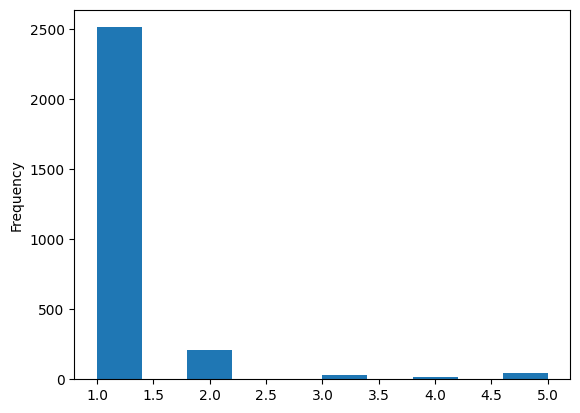

In [191]:
df1['RatecodeID'].plot(kind='hist')
plt.show()

In [192]:
# Find which columns have negative values
neg_counts = (df.select_dtypes(include=['number']) < 0).sum()
neg_counts

,0
VendorID,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
fare_amount,2850
extra,1455
mta_tax,2749


In [193]:
# fix these negative values
neg_counts=df[df.select_dtypes(include=['number']) < 0]

In [194]:
df[df.select_dtypes(include=['number']) < 0]=0

In [195]:
(df.select_dtypes(include=['number'])<0).sum()

,0
VendorID,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
fare_amount,0
extra,0
mta_tax,0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [196]:
# Find the proportion of missing values in each column
df.isna().sum()/len(df)*100

,0
VendorID,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
passenger_count,3.294860
trip_distance,0.000000
RatecodeID,3.294860
store_and_fwd_flag,3.294860
PULocationID,0.000000
DOLocationID,0.000000
payment_type,0.000000


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [197]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

In [198]:
df2=df[df['passenger_count'].isna()]
df2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
5,2,2023-01-01 00:45:00,2023-01-01 01:21:00,NaN,6.00,NaN,None,234,225,0,...,0.5,0.00,0.0,1.0,42.77,NaN,NaN,2023-01-01,0,NaN
6,2,2023-01-01 00:56:00,2023-01-01 01:08:45,NaN,2.89,NaN,None,181,17,0,...,0.5,3.73,0.0,1.0,22.40,NaN,NaN,2023-01-01,0,NaN
38,2,2023-01-01 00:45:00,2023-01-01 01:04:00,NaN,5.25,NaN,None,256,162,0,...,0.5,2.27,0.0,1.0,34.63,NaN,NaN,2023-01-01,0,NaN
70,2,2023-01-01 01:45:11,2023-01-01 02:00:49,NaN,6.27,NaN,None,209,140,0,...,0.5,6.66,0.0,1.0,39.97,NaN,NaN,2023-01-01,1,NaN
73,2,2023-01-01 01:39:32,2023-01-01 01:51:28,NaN,3.53,NaN,None,41,141,0,...,0.5,4.84,0.0,0.3,29.06,NaN,NaN,2023-01-01,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287276,2,2023-12-31 23:20:41,2023-12-31 23:53:58,NaN,15.70,NaN,None,218,145,0,...,0.5,0.00,0.0,1.0,45.94,NaN,NaN,2023-12-31,23,NaN
287279,2,2023-12-31 23:36:15,2023-12-31 23:50:18,NaN,3.05,NaN,None,141,238,0,...,0.5,0.00,0.0,1.0,19.95,NaN,NaN,2023-12-31,23,NaN
287281,2,2023-12-31 23:35:44,2024-01-01 00:02:29,NaN,16.38,NaN,None,81,50,0,...,0.5,0.00,0.0,1.0,57.75,NaN,NaN,2023-12-31,23,NaN
287289,2,2023-12-31 23:15:09,2023-12-31 23:20:56,NaN,0.84,NaN,None,42,41,0,...,0.5,0.00,0.0,1.0,10.08,NaN,NaN,2023-12-31,23,NaN


In [199]:
df['passenger_count'].median()

1.0

In [200]:
df['passenger_count'].fillna(df['passenger_count'].median(),inplace=True)

In [201]:
df['passenger_count'].isna().sum()

0

Did you find zeroes in passenger_count? Handle these.

In [202]:
(df['passenger_count']==0).sum()

4341

In [203]:
df['passenger_count'].replace(0,1,inplace=True)

In [204]:
(df['passenger_count']==0).sum()

0

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [205]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].isna().sum()

9466

In [206]:
df['RatecodeID'].median()

1.0

In [207]:
df['RatecodeID'].fillna(df['RatecodeID'].median(),inplace=True)

In [208]:
df['RatecodeID'].isna().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [209]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].isnull().sum()

9466

In [210]:
df['congestion_surcharge'].median()

2.5

In [211]:
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(),inplace= True)

In [212]:
df['congestion_surcharge'].isnull().sum()

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [213]:
# Handle any remaining missing values
df.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,9466
PULocationID,0
DOLocationID,0
payment_type,0


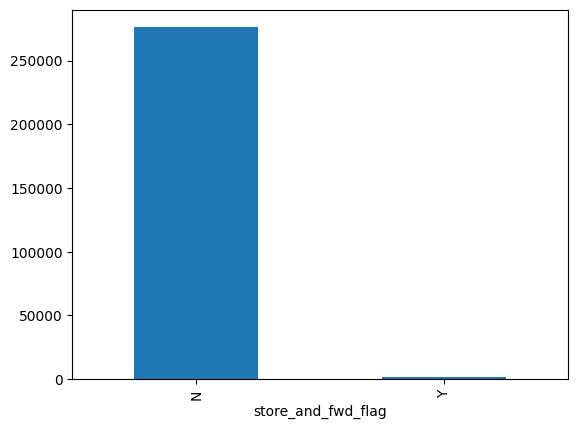

In [214]:
df['store_and_fwd_flag'].value_counts().plot.bar()
plt.show()

In [215]:
nul_flag=df[df['store_and_fwd_flag'].isnull()]
nul_flag.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
5,2,2023-01-01 00:45:00,2023-01-01 01:21:00,1.0,6.00,1.0,None,234,225,0,...,0.5,0.00,0.0,1.0,42.77,2.5,NaN,2023-01-01,0,NaN
6,2,2023-01-01 00:56:00,2023-01-01 01:08:45,1.0,2.89,1.0,None,181,17,0,...,0.5,3.73,0.0,1.0,22.40,2.5,NaN,2023-01-01,0,NaN


In [216]:
df['store_and_fwd_flag'].mode()[0]

'N'

In [217]:
df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0],inplace=True)

In [218]:
df['store_and_fwd_flag'].isnull().sum()

0

handling null values in airportfee

In [219]:
df['airport_fee'].isnull().sum()

9466

In [220]:
df['airport_fee'].median()

0.0

In [221]:
df['airport_fee'].fillna(df['airport_fee'].median(),inplace=True)

In [222]:
df['airport_fee'].isnull().sum()

0

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [223]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

In [224]:
df.select_dtypes(include=['number']).describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour,Airport_fee
count,287296.000000,287296.000000,287296.000000,287296.000000,287296.000000,287296.000000,287296.000000,287296.000000,287296.000000,287296.000000,287296.000000,287296.000000,287296.000000,287296.000000,287296.000000,287296.000000,287296.000000,255343.000000
mean,1.736408,1.374032,4.287558,1.605598,165.034699,163.925982,1.187305,19.659606,1.571208,0.490358,3.513734,0.589445,0.989246,28.631613,2.291417,0.136222,14.262879,0.143409
std,0.444749,0.865040,257.224622,7.207081,64.079340,69.838191,0.556480,18.453406,1.825417,0.068783,4.026829,2.165804,0.102537,23.039966,0.691341,0.454594,5.812232,0.469579
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.040000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.900000,2.500000,0.000000,11.000000,0.000000
50%,2.000000,1.000000,1.780000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.800000,0.000000,1.000000,21.000000,2.500000,0.000000,15.000000,0.000000
75%,2.000000,1.000000,3.400000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.400000,0.000000,1.000000,30.720000,2.500000,0.000000,19.000000,0.000000
max,6.000000,8.000000,116439.710000,99.000000,265.000000,265.000000,4.000000,715.600000,11.750000,0.800000,126.350000,77.000000,1.000000,724.150000,2.500000,1.750000,23.000000,1.750000


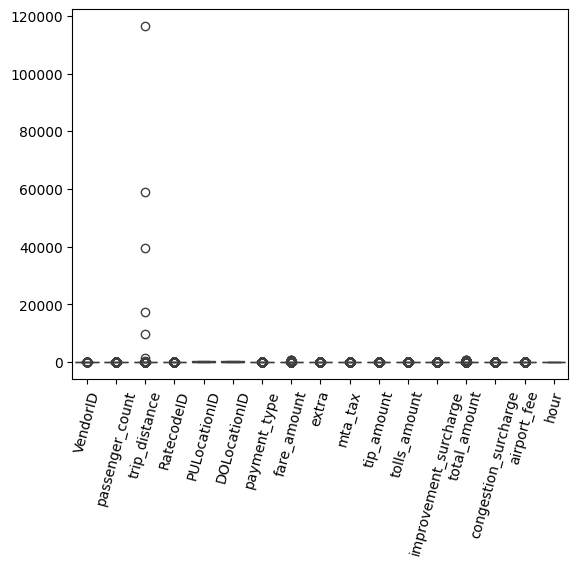

In [225]:
sns.boxplot(data=df[['VendorID','passenger_count','trip_distance','RatecodeID','PULocationID','DOLocationID','payment_type','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','airport_fee','hour']])
plt.xticks(rotation=75)
plt.show()

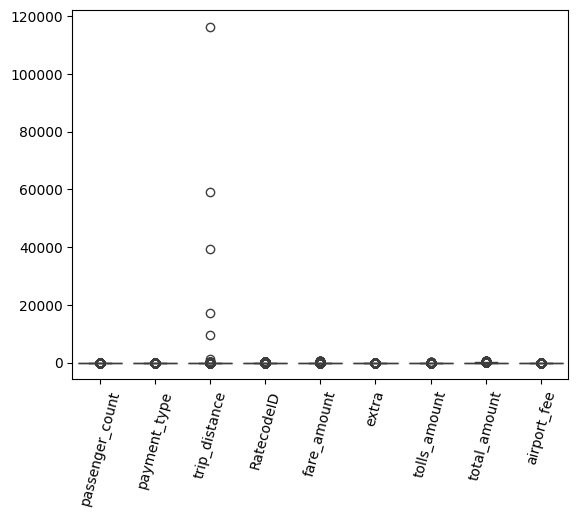

In [226]:
sns.boxplot(data=df[['passenger_count','payment_type','trip_distance','RatecodeID','fare_amount','extra','tolls_amount','total_amount','airport_fee']])
plt.xticks(rotation=75)
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [227]:
# remove passenger_count > 6
df=df[~(df['passenger_count']>6)]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,1,...,0.5,1.88,0.00,1.0,11.28,2.5,0.0,2023-01-01,0,NaN
1,2,2023-01-01 00:49:02,2023-01-01 00:55:15,1.0,0.75,1.0,N,45,148,2,...,0.5,0.00,0.00,1.0,12.90,2.5,0.0,2023-01-01,0,NaN
2,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,1,...,0.5,4.80,0.00,1.0,28.90,2.5,0.0,2023-01-01,0,NaN
3,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,1,...,0.5,7.25,0.00,1.0,36.25,2.5,0.0,2023-01-01,0,NaN
4,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,...,0.5,12.00,6.55,1.0,92.55,2.5,0.0,2023-01-01,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287291,2,2023-12-31 23:31:33,2023-12-31 23:52:27,1.0,4.79,1.0,N,90,25,1,...,0.5,5.94,0.00,1.0,35.64,2.5,0.0,2023-12-31,23,0.0
287292,2,2023-12-31 23:21:51,2023-12-31 23:28:58,2.0,1.83,1.0,N,148,137,1,...,0.5,3.00,0.00,1.0,18.00,2.5,0.0,2023-12-31,23,0.0
287293,2,2023-12-31 23:38:22,2023-12-31 23:59:53,1.0,8.32,1.0,N,170,116,0,...,0.5,0.00,0.00,1.0,39.40,2.5,0.0,2023-12-31,23,NaN
287294,2,2023-12-31 23:54:57,2024-01-01 00:03:59,5.0,2.65,1.0,N,79,256,1,...,0.5,4.80,0.00,1.0,24.00,2.5,0.0,2023-12-31,23,0.0


In [228]:
(df['passenger_count']>6).sum()

0

In [229]:
# Continue with outlier handling
df=df[~((df['trip_distance']==0) & (df['fare_amount']==0)& (df['PULocationID']!=df['DOLocationID']))]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,1,...,0.5,1.88,0.00,1.0,11.28,2.5,0.0,2023-01-01,0,NaN
1,2,2023-01-01 00:49:02,2023-01-01 00:55:15,1.0,0.75,1.0,N,45,148,2,...,0.5,0.00,0.00,1.0,12.90,2.5,0.0,2023-01-01,0,NaN
2,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,1,...,0.5,4.80,0.00,1.0,28.90,2.5,0.0,2023-01-01,0,NaN
3,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,1,...,0.5,7.25,0.00,1.0,36.25,2.5,0.0,2023-01-01,0,NaN
4,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,...,0.5,12.00,6.55,1.0,92.55,2.5,0.0,2023-01-01,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287291,2,2023-12-31 23:31:33,2023-12-31 23:52:27,1.0,4.79,1.0,N,90,25,1,...,0.5,5.94,0.00,1.0,35.64,2.5,0.0,2023-12-31,23,0.0
287292,2,2023-12-31 23:21:51,2023-12-31 23:28:58,2.0,1.83,1.0,N,148,137,1,...,0.5,3.00,0.00,1.0,18.00,2.5,0.0,2023-12-31,23,0.0
287293,2,2023-12-31 23:38:22,2023-12-31 23:59:53,1.0,8.32,1.0,N,170,116,0,...,0.5,0.00,0.00,1.0,39.40,2.5,0.0,2023-12-31,23,NaN
287294,2,2023-12-31 23:54:57,2024-01-01 00:03:59,5.0,2.65,1.0,N,79,256,1,...,0.5,4.80,0.00,1.0,24.00,2.5,0.0,2023-12-31,23,0.0


In [230]:
df[(df['trip_distance']==0) & (df['fare_amount']==0)& (df['PULocationID']!=df['DOLocationID'])]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee


In [231]:
df.drop(df[df['trip_distance']>250].index,inplace=True)

In [232]:
(df['trip_distance']>250).sum()

0

In [233]:
df.drop(df[df['payment_type']==0].index,inplace=True)

In [234]:
(df['payment_type']==0).sum()

0

In [235]:
# Do any columns need standardising?
df.select_dtypes(include=['object','category']).describe()

,store_and_fwd_flag,date
count,277799,277799
unique,2,363
top,N,2023-12-14
freq,276099,1009


In [236]:
df['date']=pd.to_datetime(df['date'])

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277799 entries, 0 to 287295
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               277799 non-null  int64         
 1   tpep_pickup_datetime   277799 non-null  datetime64[us]
 2   tpep_dropoff_datetime  277799 non-null  datetime64[us]
 3   passenger_count        277799 non-null  float64       
 4   trip_distance          277799 non-null  float64       
 5   RatecodeID             277799 non-null  float64       
 6   store_and_fwd_flag     277799 non-null  object        
 7   PULocationID           277799 non-null  int64         
 8   DOLocationID           277799 non-null  int64         
 9   payment_type           277799 non-null  int64         
 10  fare_amount            277799 non-null  float64       
 11  extra                  277799 non-null  float64       
 12  mta_tax                277799 non-null  float64  

In [238]:
df['p_month']=df['tpep_pickup_datetime'].dt.month_name()
df['p_month'].value_counts()

,count
p_month,
May,25592
October,25295
March,24898
June,24109
November,24084
December,24030
April,23986
January,22485
February,21289


In [239]:
df['Quater']=df['tpep_pickup_datetime'].dt.quarter
df['Quater'].value_counts()

,count
Quater,
2,73687
4,73409
1,68672
3,62031


In [240]:
df['p_weekdays']=df['tpep_pickup_datetime'].dt.day_name()
df['p_weekdays'].value_counts()

,count
p_weekdays,
Thursday,43584
Wednesday,42660
Friday,41220
Saturday,40378
Tuesday,40288
Sunday,34893
Monday,34776


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [241]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour',
 'Airport_fee',
 'p_month',
 'Quater',
 'p_weekdays']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:Categorical
* `tpep_pickup_datetime`:Numerical
* `tpep_dropoff_datetime`:Numerical
* `passenger_count`:Numerical
* `trip_distance`:Numerical
* `RatecodeID`:Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Numerical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount:Numerical`
* `extra`:Numerical
* `mta_tax`:Numerical
* `tip_amount`:Numerical
* `tolls_amount`:Numerical
* `improvement_surcharge`:Numerical
* `total_amount`:Numerical
* `congestion_surcharge`:Numerical
* `airport_fee`:Numerical


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [242]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour',
       'Airport_fee', 'p_month', 'Quater', 'p_weekdays'],
      dtype='object')

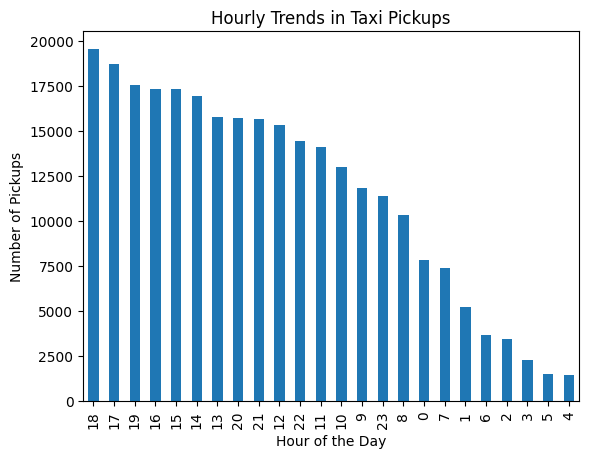

In [243]:
# Find and show the hourly trends in taxi pickups
df['hour'].value_counts().plot(kind='bar')
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()


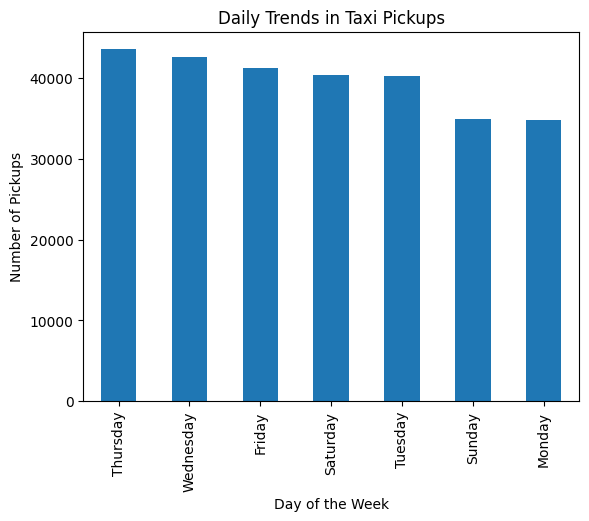

In [244]:
# Find and show the daily trends in taxi pickups (days of the week)
df['p_weekdays'].value_counts().plot(kind='bar')
plt.title('Daily Trends in Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.show()


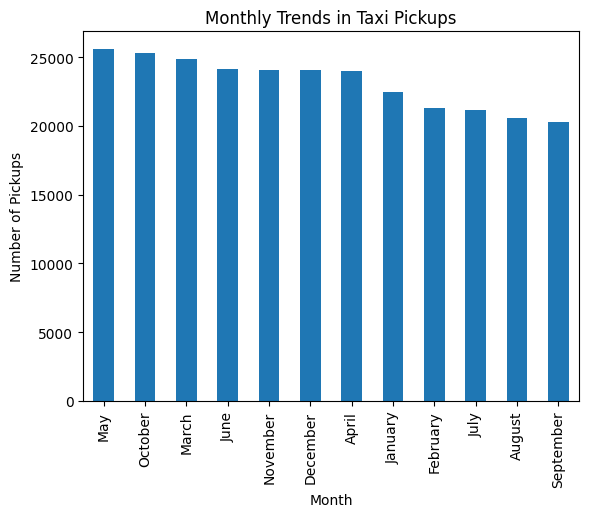

In [245]:
# Show the monthly trends in pickups
df['p_month'].value_counts().plot(kind='bar')
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

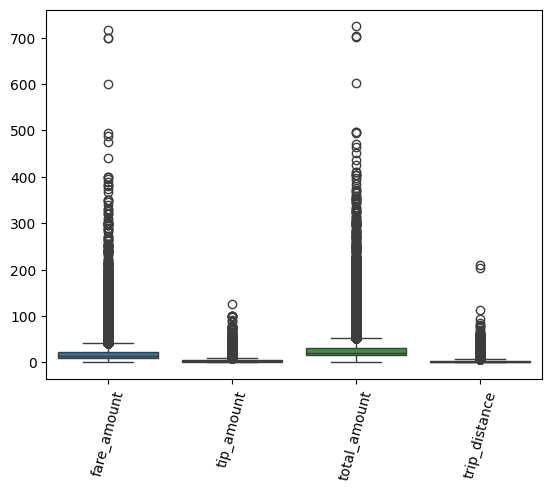

In [246]:
# Analyse the above parameters
sns.boxplot(data=df[['fare_amount','tip_amount','total_amount','trip_distance']])
plt.xticks(rotation=75)
plt.show()


In [247]:
(df['fare_amount']==0).sum()

2883

In [248]:
(df['trip_distance']==0).sum()

3742

In [249]:
(df['total_amount']==0).sum()

2849

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [250]:
# Create a df with non zero entries for the selected parameters.
df.drop(df[(df['fare_amount']==0)|(df['trip_distance']==0)|(df['total_amount']==0)|(df['tip_amount']==0)].index,inplace=True)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee,p_month,Quater,p_weekdays
0,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,1,...,1.0,11.28,2.5,0.0,2023-01-01,0,NaN,January,1,Sunday
2,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,1,...,1.0,28.90,2.5,0.0,2023-01-01,0,NaN,January,1,Sunday
3,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,1,...,1.0,36.25,2.5,0.0,2023-01-01,0,NaN,January,1,Sunday
4,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,...,1.0,92.55,2.5,0.0,2023-01-01,0,NaN,January,1,Sunday
7,2,2023-01-01 00:13:54,2023-01-01 00:21:26,1.0,2.03,1.0,N,142,75,1,...,1.0,18.84,2.5,0.0,2023-01-01,0,NaN,January,1,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287290,2,2023-12-31 23:02:45,2023-12-31 23:18:21,1.0,2.44,1.0,N,68,211,1,...,1.0,24.72,2.5,0.0,2023-12-31,23,0.0,December,4,Sunday
287291,2,2023-12-31 23:31:33,2023-12-31 23:52:27,1.0,4.79,1.0,N,90,25,1,...,1.0,35.64,2.5,0.0,2023-12-31,23,0.0,December,4,Sunday
287292,2,2023-12-31 23:21:51,2023-12-31 23:28:58,2.0,1.83,1.0,N,148,137,1,...,1.0,18.00,2.5,0.0,2023-12-31,23,0.0,December,4,Sunday
287294,2,2023-12-31 23:54:57,2024-01-01 00:03:59,5.0,2.65,1.0,N,79,256,1,...,1.0,24.00,2.5,0.0,2023-12-31,23,0.0,December,4,Sunday


In [251]:
(df['total_amount']==0).sum()

0

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [252]:
# Group data by month and analyse monthly revenue
df.groupby('p_month')['total_amount'].sum().sort_values(ascending=False)

,total_amount
p_month,
October,599928.43
May,586593.79
June,555576.87
November,554538.87
March,549929.63
December,544568.74
April,541064.43
January,484348.61
September,474802.18


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [253]:
# Calculate proportion of each quarter
df.groupby('Quater')['total_amount'].sum().sort_values(ascending=False)/df['total_amount'].sum()*100

,total_amount
Quater,
4,27.091220
2,26.839273
1,23.828003
3,22.241504


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [254]:
(df['trip_distance']==0).sum()

0

In [255]:
(df['fare_amount']==0).sum()

0

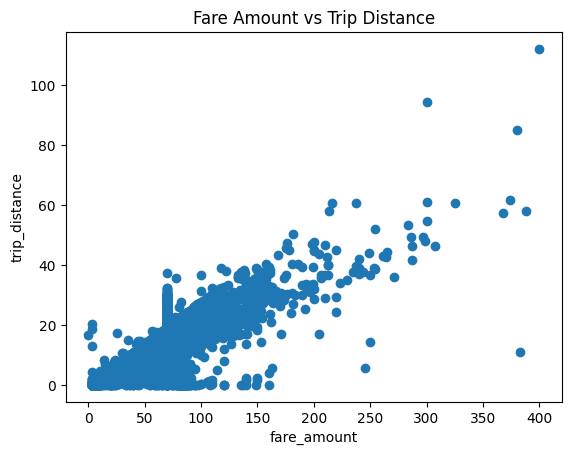

In [256]:
# Show how trip fare is affected by distance
plt.scatter(df['fare_amount'], df['trip_distance'])
plt.xlabel('fare_amount')
plt.ylabel('trip_distance')
plt.title('Fare Amount vs Trip Distance')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [257]:
# Show relationship between fare and trip duration
df['trip_duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df['trip_duration']=df['trip_duration'].dt.total_seconds()
df['trip_duration']

,trip_duration
0,79.0
2,1184.0
3,1536.0
4,1710.0
7,452.0
...,...
287290,936.0
287291,1254.0
287292,427.0
287294,542.0


Text(0.5, 1.0, 'Fare Amount vs Trip_duration')

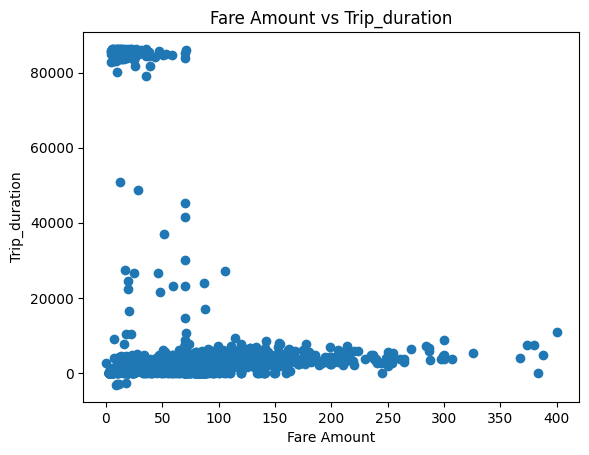

In [258]:
plt.scatter(df['fare_amount'], df['trip_duration'])
plt.xlabel('Fare Amount')
plt.ylabel('Trip_duration')
plt.title('Fare Amount vs Trip_duration')

Text(0.5, 1.0, 'fare amount vs number of passengers')

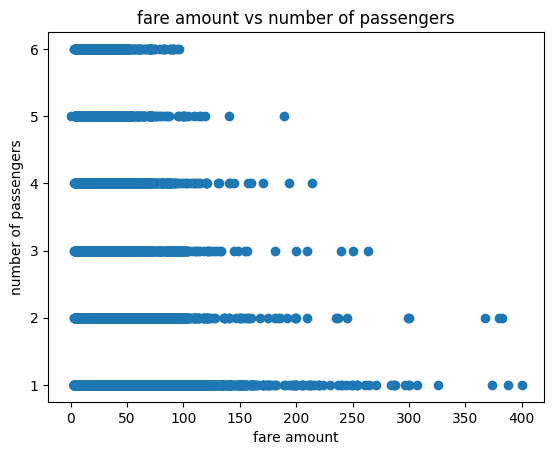

In [259]:
# Show relationship between fare and number of passengers
plt.scatter(df['fare_amount'],df['passenger_count'])
plt.xlabel('fare amount')
plt.ylabel('number of passengers')
plt.title('fare amount vs number of passengers')

Text(0.5, 1.0, 'tip ampunt vs trip distance')

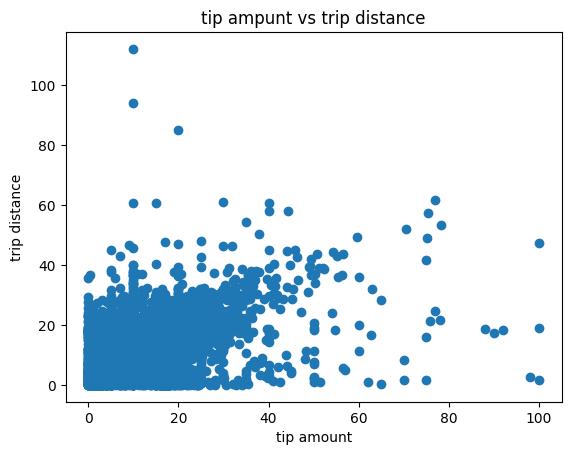

In [260]:
# Show relationship between tip and trip distance
plt.scatter(df['tip_amount'],df['trip_distance'])
plt.xlabel('tip amount')
plt.ylabel('trip distance')
plt.title('tip ampunt vs trip distance')

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

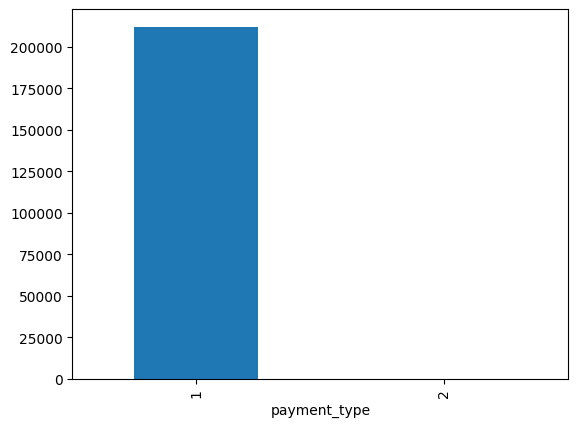

In [261]:
# Analyse the distribution of different payment types (payment_type).
#sns.countplot(data=df['payment_type'])
df['payment_type'].value_counts().plot(kind='bar')
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [262]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [263]:
 import geopandas as gpd
# Read the shapefile using geopandas
zones =gpd.read_file('/content/drive/MyDrive/EDA-credit_geo/taxi_zones.shp') # read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

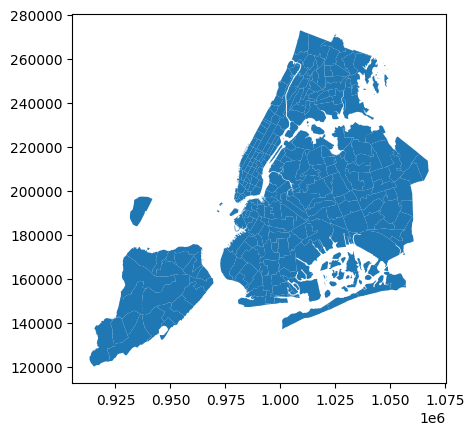

In [264]:
 print(zones.info())
 zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [265]:
# Merge zones and trip records using locationID and PULocationID
df=pd.merge(df,zones,how='left',left_on='PULocationID',right_on='LocationID')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Quater,p_weekdays,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,1,...,1,Sunday,79.0,239.0,0.063626,0.000205,Upper West Side South,239.0,Manhattan,"POLYGON ((991168.979 226252.992, 991955.565 22..."
1,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,1,...,1,Sunday,1184.0,142.0,0.038176,0.000076,Lincoln Square East,142.0,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21..."
2,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,1,...,1,Sunday,1536.0,43.0,0.099739,0.000380,Central Park,43.0,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21..."
3,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,...,1,Sunday,1710.0,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
4,2,2023-01-01 00:13:54,2023-01-01 00:21:26,1.0,2.03,1.0,N,142,75,1,...,1,Sunday,452.0,142.0,0.038176,0.000076,Lincoln Square East,142.0,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21..."


In [266]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour',
       'Airport_fee', 'p_month', 'Quater', 'p_weekdays', 'trip_duration',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [267]:
# Group data by location and calculate the number of trips
df.groupby('PULocationID')['trip_distance'].count()

,trip_distance
PULocationID,
1,8
4,209
7,39
8,1
10,58
...,...
261,1022
262,2928
263,4142


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [268]:
# Merge trip counts back to the zones GeoDataFrame
numberof_trip=df.groupby('PULocationID')['trip_distance'].count()

In [269]:
numberof_trip=numberof_trip.to_frame().reset_index()

In [270]:
numberof_trip.rename(columns={'trip_distance':'trip_count'},inplace=True)
numberof_trip

,PULocationID,trip_count
0,1,8
1,4,209
2,7,39
3,8,1
4,10,58
...,...,...
158,261,1022
159,262,2928
160,263,4142
161,264,1830


In [271]:
zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB


In [272]:
zones = pd.merge(zones, numberof_trip, how='left', left_on='LocationID', right_on='PULocationID')


In [274]:
zones

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,8.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",NaN,0.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",NaN,0.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,209.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",NaN,0.0
...,...,...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ...",NaN,0.0
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ...",260.0,15.0
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19...",261.0,1022.0
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824....",262.0,2928.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

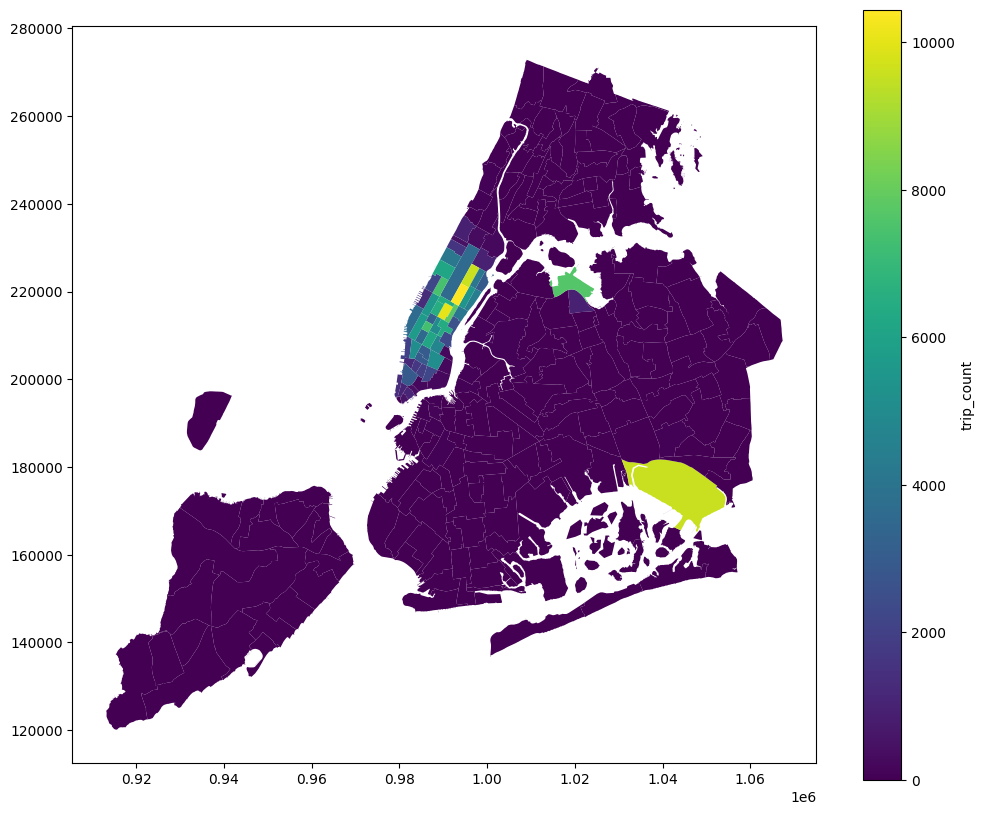

In [275]:
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
zones.plot(column = 'trip_count',
ax = ax,
legend = True,
legend_kwds = {'label': "trip_count", 'orientation': "vertical"})
plt.show()

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

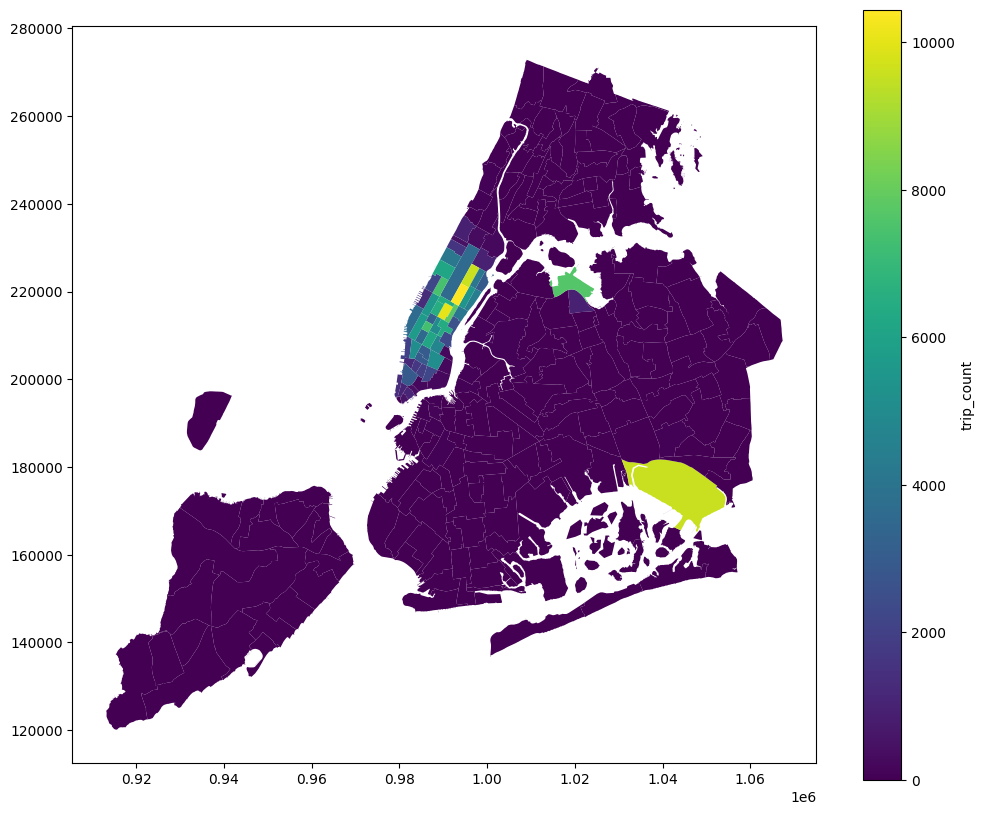

In [276]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column = 'trip_count',
ax = ax,
legend = True,
legend_kwds = {'label': "trip_count", 'orientation': "vertical"})
plt.show()


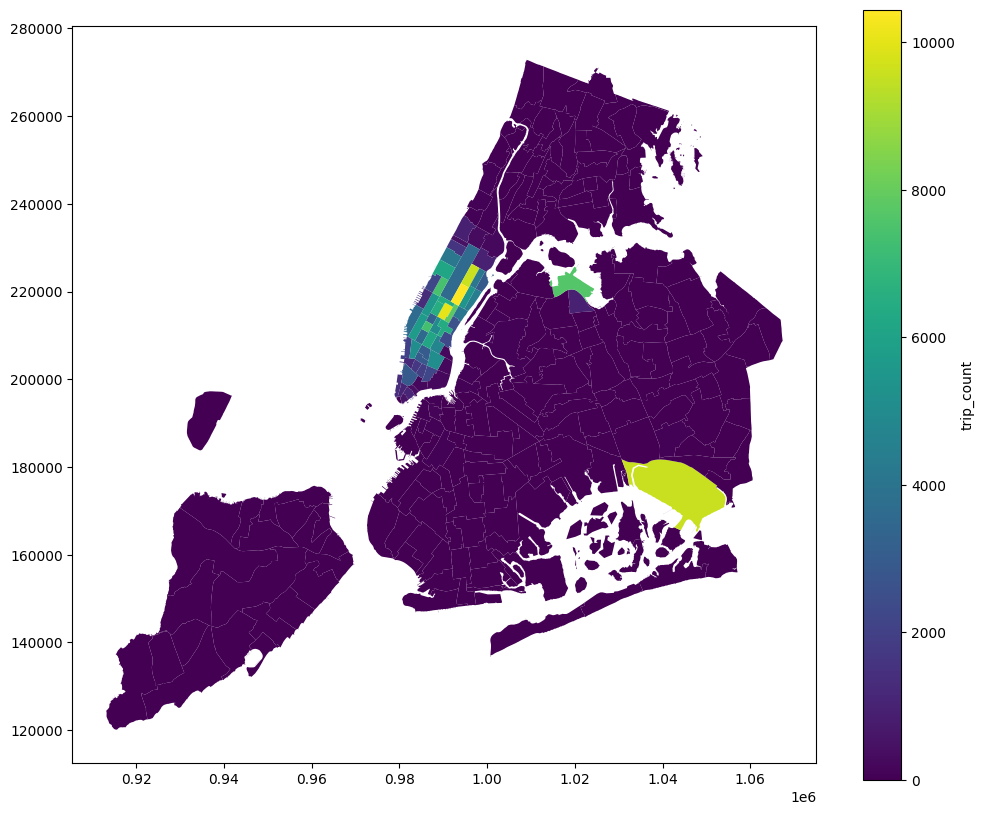

In [277]:
# can you try displaying the zones DF sorted by the number of trips?
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
zones.sort_values(by='trip_count',ascending=False)
zones.plot(
column = 'trip_count',
ax = ax,
legend = True,
legend_kwds = {'label': "trip_count", 'orientation': "vertical"})
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [278]:
 # Find routes which have the slowest speeds at different times of the day

In [279]:
df['trip_duration'] = df['trip_duration'] / 3600  # Only do this if duration is in seconds

route_speed = df.groupby(['PULocationID', 'DOLocationID', 'hour']).agg(
    total_distance=('trip_distance', 'sum'),
    avg_duration=('trip_duration', 'mean')
).reset_index()

# Ensure avg_duration is not too small
route_speed = route_speed[route_speed['avg_duration'] > 0.01]  # Remove extremely small durations

# Calculate Speed
route_speed['speed'] = route_speed['total_distance'] / route_speed['avg_duration']
route_speed.sort_values(by='speed',ascending=False)


,PULocationID,DOLocationID,hour,total_distance,avg_duration,speed
4676,65,65,21,18.80,0.010278,1829.189189
52562,264,264,21,308.43,0.235222,1311.232073
45497,237,236,19,111.78,0.088020,1269.931491
52563,264,264,22,323.75,0.260095,1244.738595
52564,264,264,23,316.67,0.255215,1240.797875
...,...,...,...,...,...,...
26093,148,33,19,2.51,23.447222,0.107049
41482,233,43,22,2.14,23.596111,0.090693
4,1,264,11,0.01,0.114722,0.087167
51166,262,238,11,1.81,23.205278,0.077999


In [280]:
route_speed=route_speed.merge(zones,how='left',left_on='PULocationID',right_on='LocationID')
#route_speed[['total_distance','LocationID','speed']].sort_values(by='speed', ascending=True).head()

In [314]:
zones.head(2)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,8.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",NaN,0.0


In [315]:
route_speed[['zone','borough','LocationID','speed']].sort_values(by='speed', ascending=True).head(10)

,zone,borough,LocationID,speed
10923,Garment District,Manhattan,100.0,0.058128
51116,Yorkville East,Manhattan,262.0,0.077999
2,Newark Airport,EWR,1.0,0.087167
41436,UN/Turtle Bay South,Manhattan,233.0,0.090693
26069,Lower East Side,Manhattan,148.0,0.107049
15443,Hudson Sq,Manhattan,125.0,0.108294
31253,Midtown North,Manhattan,163.0,0.110633
40214,TriBeCa/Civic Center,Manhattan,231.0,0.135797
34315,Murray Hill,Manhattan,170.0,0.137430
14283,Greenwich Village South,Manhattan,114.0,0.180266


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

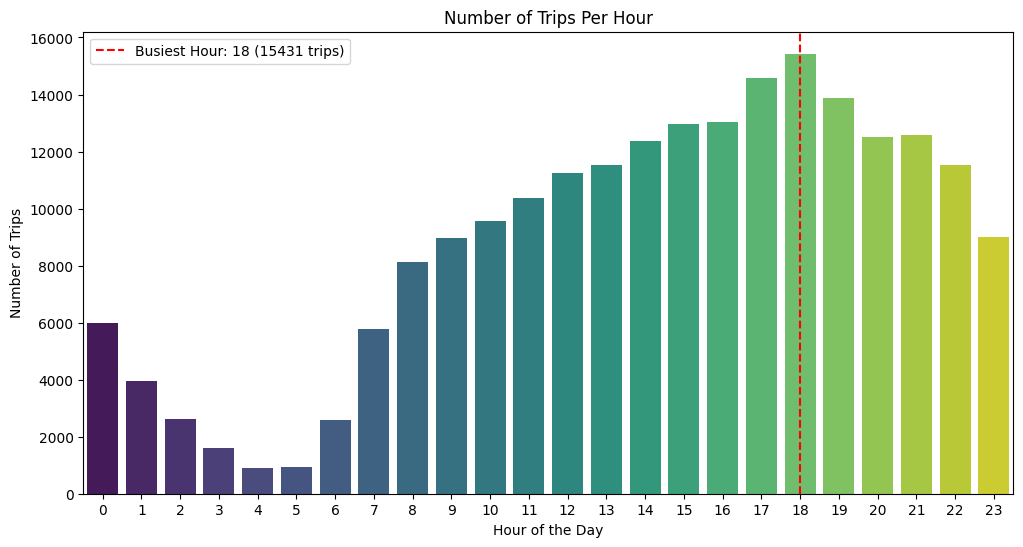

Actual number of trips in the busiest hour (18:00): 154310.0


In [282]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = df['hour'].value_counts().sort_index()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()
busiest_trips = trips_per_hour.max()

# Plot the hourly distribution
plt.figure(figsize=(12,6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette="viridis")

plt.axvline(busiest_hour, color='r', linestyle='--', label=f'Busiest Hour: {busiest_hour} ({busiest_trips} trips)')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of Trips Per Hour")
plt.legend()
plt.show()

#print(f"Busiest Hour: {busiest_hour} with {busiest_trips} trips")
sampling_ratio = 0.1  # Example: If we took 10% of trips
actual_trips_per_hour = trips_per_hour / sampling_ratio

print(f"Actual number of trips in the busiest hour ({busiest_hour}:00): {actual_trips_per_hour[busiest_hour]}")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [283]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =0.1

# Find the five busiest hours
top_5_hours = trips_per_hour.nlargest(5)

# Scale up the trip counts
scaled_trips = (top_5_hours / sample_fraction).astype(int)

# Display results
print("Actual Number of Trips in the Five Busiest Hours:")
print(scaled_trips)



Actual Number of Trips in the Five Busiest Hours:
hour
18    154310
17    145720
19    138950
16    130470
15    129770
Name: count, dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [284]:
# Compare traffic trends for the week days and weekends
df['day_type']=df['p_weekdays'].apply(lambda x:'weekend' if x in ['Saturday','Sunday'] else 'weekday')
df['day_type'].value_counts()

,count
day_type,
weekday,155309
weekend,56818


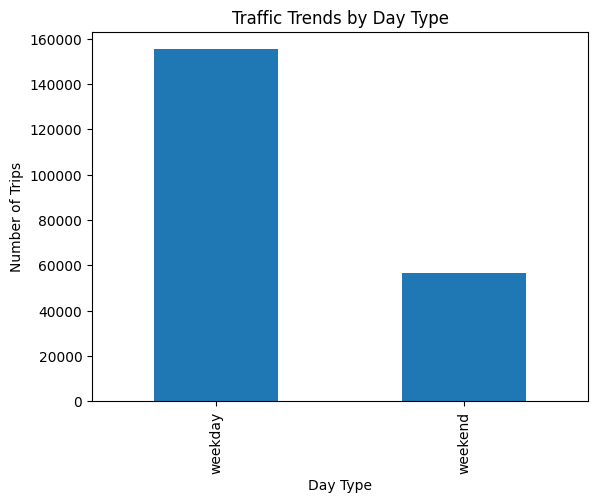

In [285]:
traffic_trends = df.groupby('day_type')['trip_distance'].count()
traffic_trends.plot(kind='bar')
plt.title('Traffic Trends by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Number of Trips')
plt.show()

In [336]:
trips_per_hour

,count
hour,
0,6002
1,3953
2,2620
3,1593
4,919
5,940
6,2584
7,5778
8,8123


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [333]:
# Find top 10 pickup and dropoff zones

top_pickup = df['PULocationID'].value_counts().head(10).reset_index()
top_pickup.columns = ['LocationID', 'pickup_count']

# Top 10 Dropoff Zones
top_dropoff = df['DOLocationID'].value_counts().head(10).reset_index()
top_dropoff.columns = ['LocationID', 'dropoff_count']

# Merge with zone names (if available)
top_pickup = top_pickup.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
top_dropoff = top_dropoff.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

print(top_pickup)
print(top_dropoff)

   LocationID  pickup_count                          zone
0         237         10441         Upper East Side South
1         161         10069                Midtown Center
2         236          9615         Upper East Side North
3         132          9580                   JFK Airport
4         162          7798                  Midtown East
5         138          7643             LaGuardia Airport
6         142          7383           Lincoln Square East
7         186          7317  Penn Station/Madison Sq West
8         230          6500     Times Sq/Theatre District
9         170          6381                   Murray Hill
   LocationID  dropoff_count                       zone
0         236          10003      Upper East Side North
1         237           9552      Upper East Side South
2         161           8443             Midtown Center
3         170           6524                Murray Hill
4         239           6384      Upper West Side South
5         142           62

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [323]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_count=df['PULocationID'].value_counts().rename('no_of_pickup').reset_index()
dropoff_count=df['DOLocationID'].value_counts().rename('no_of_dropoff').reset_index()
print(pickup_count)
print(dropoff_count)

     PULocationID  no_of_pickup
0             237         10441
1             161         10069
2             236          9615
3             132          9580
4             162          7798
..            ...           ...
158            92             1
159           123             1
160           173             1
161           177             1
162           258             1

[163 rows x 2 columns]
     DOLocationID  no_of_dropoff
0             236          10003
1             237           9552
2             161           8443
3             170           6524
4             239           6384
..            ...            ...
247           154              2
248           109              1
249           118              1
250           176              1
251           172              1

[252 rows x 2 columns]


In [338]:
ratio=pickup_count['no_of_pickup']/dropoff_count['no_of_dropoff']
top10_r=ratio.sort_values(ascending=False).head(10)
bottom10_r=ratio.sort_values(ascending=True).head(10)
print(top10_r)
print(bottom10_r)

3     1.468424
12    1.251117
4     1.221491
7     1.220924
5     1.219174
6     1.217513
10    1.190299
13    1.178674
9     1.176221
14    1.165902
dtype: float64
129    0.030303
130    0.030303
131    0.031250
132    0.032258
133    0.033333
134    0.033333
135    0.033333
136    0.034483
137    0.035714
138    0.037037
dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [350]:
night_df = df[df['hour'].isin([23, 0, 1, 2, 3, 4, 5])]

# Get top 10 nighttime pickup zones
night_pkup = night_df.groupby('PULocationID')['trip_distance'].count().reset_index()
night_pkup.rename(columns={'trip_distance': 'no_of_pickups'}, inplace=True)
night_pkup = night_pkup.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID')
print(night_pkup[['zone','PULocationID','no_of_pickups']].nlargest(10, 'no_of_pickups'))

# Get top 10 nighttime dropoff zones
night_drop = night_df.groupby('DOLocationID')['trip_distance'].count().reset_index()
night_drop.rename(columns={'trip_distance': 'no_of_dropoffs'}, inplace=True)
night_drop = night_drop.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID')
print(night_drop[['zone', 'no_of_dropoffs','DOLocationID']].nlargest(10, 'no_of_dropoffs'))

                             zone  PULocationID  no_of_pickups
30                   East Village            79           1896
109                  West Village           249           1557
50                    JFK Airport           132           1408
18                   Clinton East            48           1240
63                Lower East Side           148           1196
44        Greenwich Village South           114           1083
97      Times Sq/Theatre District           230            869
79   Penn Station/Madison Sq West           186            790
74                  Midtown South           164            735
41                       Gramercy           107            728
                              zone  no_of_dropoffs  DOLocationID
69                    East Village            1013            79
147                    Murray Hill             776           170
41                    Clinton East             764            48
92                        Gramercy             

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [291]:
# Filter for night hours (11 PM to 5 AM)
night_hour=df[df['hour'].isin([23,0,1,2,3,4,5])]
day_hour=df[~df['hour'].isin([23,0,1,2,3,4,5])]
night_hour.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,p_weekdays,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,day_type
0,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,1,...,Sunday,0.021944,239.0,0.063626,0.000205,Upper West Side South,239.0,Manhattan,"POLYGON ((991168.979 226252.992, 991955.565 22...",weekend
1,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,1,...,Sunday,0.328889,142.0,0.038176,0.000076,Lincoln Square East,142.0,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21...",weekend
2,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,1,...,Sunday,0.426667,43.0,0.099739,0.000380,Central Park,43.0,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21...",weekend
3,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,...,Sunday,0.475000,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",weekend
4,2,2023-01-01 00:13:54,2023-01-01 00:21:26,1.0,2.03,1.0,N,142,75,1,...,Sunday,0.125556,142.0,0.038176,0.000076,Lincoln Square East,142.0,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21...",weekend


In [292]:
night_revenue=night_hour['total_amount'].sum()
night_revenue

746405.26

In [293]:
day_revenue=day_hour['total_amount'].sum()
day_revenue

5525442.629999999

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [294]:
# Analyse the fare per mile per passenger for different passenger counts

In [295]:
# Step 1: Calculate the fare per mile
df['fare_per_mile'] = df['total_amount'] / df['trip_distance']

# Display the first few rows of the DataFrame after the calculation
print(df[['total_amount', 'trip_distance', 'fare_per_mile']].head())
# Step 2: Group by 'passenger_count' and calculate the average fare per mile
avg_fare_per_mile = df.groupby('passenger_count')['fare_per_mile'].mean()

# Display the result
print(avg_fare_per_mile)

   total_amount  trip_distance  fare_per_mile
0         11.28           0.49      23.020408
1         28.90           2.90       9.965517
2         36.25           2.50      14.500000
3         92.55          20.37       4.543446
4         18.84           2.03       9.280788
passenger_count
1.0    15.475222
2.0    16.807153
3.0    15.263719
4.0    28.835807
5.0    13.002575
6.0    15.024136
Name: fare_per_mile, dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [296]:
# Compare the average fare per mile for different days and for different times of the day
avg_fare_per_mile_hour=df.groupby('hour')['fare_per_mile'].mean()
print(avg_fare_per_mile_hour)
avg_fare_per_mile_day=df.groupby('p_weekdays')['fare_per_mile'].mean()
print(avg_fare_per_mile_day)


hour
0     17.676508
1     14.175588
2     13.553356
3     11.125841
4     12.100460
5     21.040608
6     11.694427
7     16.215085
8     14.122533
9     14.128000
10    16.579403
11    16.254315
12    14.754149
13    16.627545
14    17.079159
15    18.168978
16    19.761257
17    20.117908
18    16.487922
19    15.260735
20    12.623177
21    13.685330
22    13.151113
23    13.890847
Name: fare_per_mile, dtype: float64
p_weekdays
Friday       16.619339
Monday       15.498030
Saturday     15.329242
Sunday       16.785113
Thursday     16.316436
Tuesday      14.889567
Wednesday    15.735160
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [297]:
# Compare fare per mile for different vendors
avg_fare_per_mile_vendor=df.groupby('VendorID')['fare_per_mile'].mean()
print(avg_fare_per_mile_vendor)

VendorID
1    13.676290
2    16.631472
Name: fare_per_mile, dtype: float64


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [298]:
# Defining distance tiers
def categorize_distance(distance):
    if distance <= 2:
        return 'Up to 2 miles'
    elif 2 < distance <= 5:
        return '2 to 5 miles'
    else:
        return 'More than 5 miles'

In [299]:
df['distance_tier'] = df['trip_distance'].apply(categorize_distance)
df['distance_tier'].value_counts()

,count
distance_tier,
Up to 2 miles,117582
2 to 5 miles,59509
More than 5 miles,35036


In [351]:
avg_fare_per_mile_tier = df.groupby(['distance_tier', 'VendorID'])['fare_per_mile'].mean().reset_index()
print(avg_fare_per_mile_tier)

       distance_tier  VendorID  fare_per_mile
0       2 to 5 miles         1       9.536633
1       2 to 5 miles         2       9.765018
2  More than 5 miles         1       6.410897
3  More than 5 miles         2       6.445353
4      Up to 2 miles         1      17.370212
5      Up to 2 miles         2      23.453033


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [361]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df['percentage_of_tip']=df['tip_amount']/df['total_amount']*100
df[['tip_amount','total_amount','percentage_of_tip','hour','passenger_count']]

,tip_amount,total_amount,percentage_of_tip,hour,passenger_count
0,1.88,11.28,16.666667,0,1.0
1,4.80,28.90,16.608997,0,2.0
2,7.25,36.25,20.000000,0,1.0
3,12.00,92.55,12.965964,0,1.0
4,3.14,18.84,16.666667,0,1.0
...,...,...,...,...,...
212122,4.12,24.72,16.666667,23,1.0
212123,5.94,35.64,16.666667,23,1.0
212124,3.00,18.00,16.666667,23,2.0
212125,4.80,24.00,20.000000,23,5.0


In [301]:
percentage_of_tip_distance=df.groupby('trip_distance')['percentage_of_tip'].mean()
percentage_of_tip_distance.sort_values(ascending=False)

,percentage_of_tip
trip_distance,
24.66,42.249657
28.27,30.204461
35.90,29.962547
47.30,29.041064
23.97,27.253457
...,...
25.90,0.097704
22.93,0.012353
24.09,0.009920


In [302]:
percentage_of_tip_passenger=df.groupby('passenger_count')['percentage_of_tip'].mean()
percentage_of_tip_passenger

,percentage_of_tip
passenger_count,
1.0,15.401191
2.0,15.440598
3.0,15.461923
4.0,15.711023
5.0,15.597310
6.0,15.503255


In [303]:
percentage_of_tip_hour=df.groupby('hour')['percentage_of_tip'].mean()
percentage_of_tip_hour

,percentage_of_tip
hour,
0,15.193991
1,15.155363
2,15.120921
3,15.250031
4,15.424252
5,14.847993
6,15.299315
7,15.237246
8,15.318261


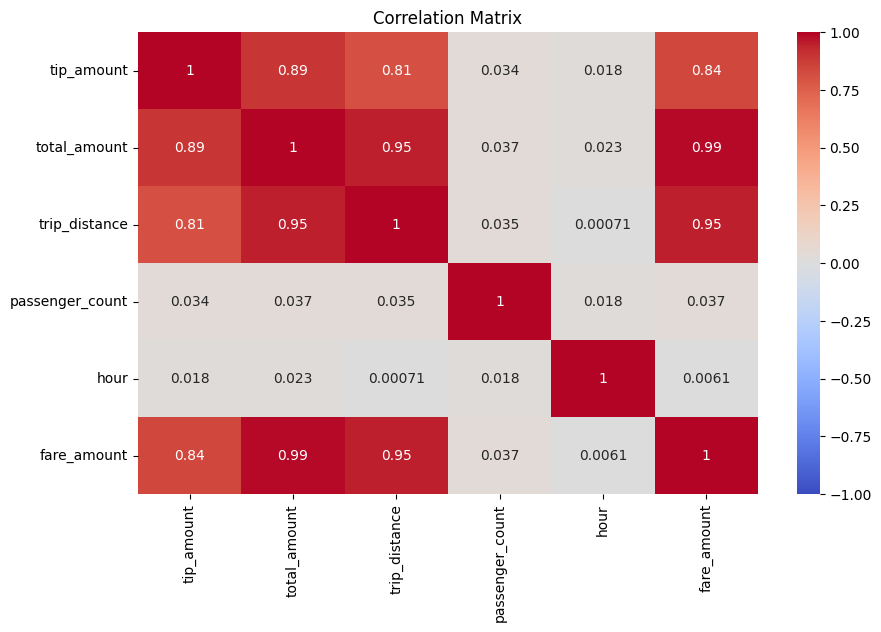

In [304]:
# Calculate the correlation matrix for numeric variables
correlation_matrix = df[['tip_amount', 'total_amount', 'trip_distance', 'passenger_count', 'hour', 'fare_amount']].corr()

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [305]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip_perc=df[df['percentage_of_tip']<10]
high_tip_perc=df[df['percentage_of_tip']>25]
print(high_tip_perc['trip_distance'].mean())
print(low_tip_perc['trip_distance'].mean())

2.4391887793783167
3.6094434359805505


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [306]:
# See how passenger count varies across hours and days
pc=df.groupby(['hour','p_weekdays'])['passenger_count'].count()
pc.sort_values(ascending=False)



hour  p_weekdays
18    Thursday      2563
      Wednesday     2554
      Tuesday       2444
17    Thursday      2363
19    Wednesday     2306
                    ... 
3     Monday          64
      Wednesday       62
4     Tuesday         60
      Wednesday       57
3     Tuesday         45
Name: passenger_count, Length: 168, dtype: int64

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [362]:
# How does passenger count vary across zones
pc_z=df.groupby('zone')['passenger_count'].count()
pc_z.sort_values(ascending=False)


,passenger_count
zone,
Upper East Side South,10441
Midtown Center,10069
Upper East Side North,9615
JFK Airport,9580
Midtown East,7798
...,...
Cypress Hills,1
Flatlands,1
Brownsville,1


In [308]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone
df['avg_passenger_count_zone']=df.groupby('zone')['passenger_count'].transform('mean')
df['avg_passenger_count_zone']

,avg_passenger_count_zone
0,1.405217
1,1.377624
2,1.473169
3,1.483507
4,1.377624
...,...
212122,1.394342
212123,1.348519
212124,1.465980
212125,1.418664


In [309]:
df[['zone', 'avg_passenger_count_zone']].drop_duplicates().head(10).sort_values(by='avg_passenger_count_zone',ascending=False)

,zone,avg_passenger_count_zone
3,JFK Airport,1.483507
2,Central Park,1.473169
0,Upper West Side South,1.405217
1,Lincoln Square East,1.377624
5,Midtown North,1.363009
10,Midtown Center,1.362201
9,Lenox Hill West,1.326335
8,Kips Bay,1.322468
6,Sutton Place/Turtle Bay North,1.320497
7,East Harlem South,1.316390


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [310]:
# How often is each surcharge applied?
often_charge=df.groupby('PULocationID')['extra'].count()
often_charge

,extra
PULocationID,
1,8
4,209
7,39
8,1
10,58
...,...
261,1022
262,2928
263,4142


In [363]:
often_charge=df.groupby('hour')['extra'].count()
often_charge

,extra
hour,
0,6002
1,3953
2,2620
3,1593
4,919
5,940
6,2584
7,5778
8,8123


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [311]:
Actual busiest hours are 18,17,19,16,15
Upper East Side South,Midtown Center,Upper East Side North,JFK Airport,Midtown East,this are the most pickuping point
Garment District-Central Park,Yorkville East-Upper West Side North,Newark Airport,UN/Turtle -Bay South,Central Park are the most traiffc routes

SyntaxError: invalid syntax (<ipython-input-311-9c082c687a6b>, line 1)

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
weekday have more demand comapre to weeends
JFK Airport,Central Park,	Upper West Side South this are the tope 3 demand zones
may.oct,march month most of the trips are done

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
its clear that trips during rush hour evening tend to have higher fares due to increased demand.
Off-Peak Hours: Conversely, trips during  early-morning hours may have lower demand, and pricing adjustments can encourage more drivers to be on the road.
Frequent Rider Discounts: Provide a discount after a certain number of trips or offer a monthly subscription model for regular riders to increase revenue in quater 3